In [3]:
%matplotlib inline
import pandas as pd 
import pandas_datareader
import datetime 
import matplotlib.pylab as plt 
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [4]:
stockFile='data/T10yr.csv'
stock=pd.read_csv(stockFile,index_col=0,parse_dates=[0])
stock.tail(10) 

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-18,1.577,1.604,1.556,1.587,0,1.587
2016-07-19,1.553,1.575,1.546,1.558,0,1.558
2016-07-20,1.568,1.596,1.566,1.580,0,1.580
2016-07-21,1.601,1.628,1.563,1.565,0,1.565
2016-07-22,1.585,1.599,1.544,1.570,0,1.570
2016-07-25,1.584,1.584,1.554,1.571,0,1.571
2016-07-26,1.559,1.587,1.549,1.563,0,1.563
2016-07-27,1.570,1.570,1.511,1.515,0,1.515
2016-07-28,1.525,1.535,1.493,1.511,0,1.511


In [5]:
stock.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,0,6.548
2000-01-04,6.530,6.548,6.485,6.485,0,6.485
2000-01-05,6.521,6.599,6.508,6.599,0,6.599
2000-01-06,6.558,6.585,6.540,6.549,0,6.549
2000-01-07,6.545,6.595,6.504,6.504,0,6.504


In [8]:
stock_week=stock['Close'].resample('W-MON').mean()
stock_train=stock_week['2000':'2015']

In [10]:
stock_train.shape

(835,)

In [11]:
stock_week.shape

(866,)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


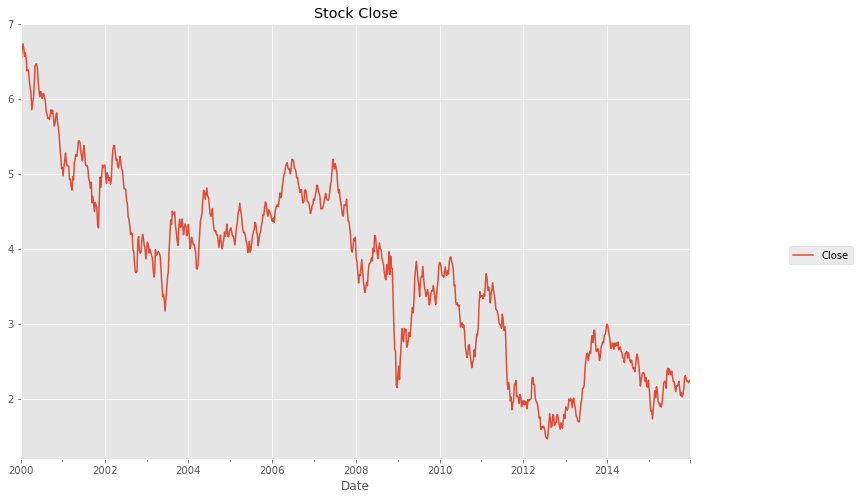

In [13]:
stock_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title('Stock Close')
sns.despine()

In [14]:
stock_diff=stock_train.diff()
stock_diff=stock_diff.dropna()

/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/nanji/miniconda3/envs/py3

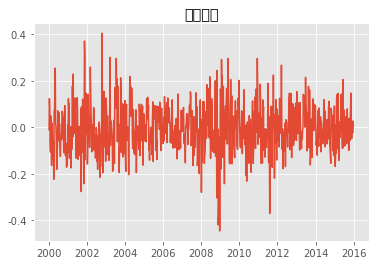

In [15]:
plt.figure()
plt.plot(stock_diff)
plt.title("一阶差分")
plt.show()

/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


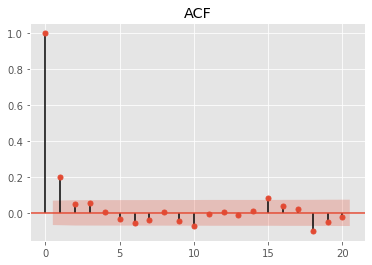

In [16]:
acf=plot_acf(stock_diff,lags=20)
plt.title('ACF')
acf.show()

/Users/nanji/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


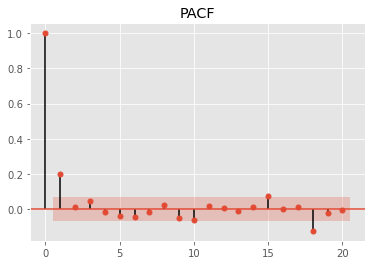

In [17]:
pacf=plot_pacf(stock_diff,lags=20)
plt.title('PACF')
pacf.show()

In [18]:
model=ARIMA(stock_train,order=(1,1,1),freq='W-MON')

In [19]:
result=model.fit()
print(result.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  834
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 720.846
Method:                       css-mle   S.D. of innovations              0.102
Date:                Tue, 08 Dec 2020   AIC                          -1433.692
Time:                        14:10:01   BIC                          -1414.787
Sample:                    01-10-2000   HQIC                         -1426.444
                         - 12-28-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0052      0.005     -1.145      0.252      -0.014       0.004
ar.L1.D.Close     0.2841      0.203      1.397      0.162      -0.115       0.683
ma.L1.D.Close    -0.0869      0.213     

In [22]:
pred=result.predict('20140609','20160701',dynamic=True,typ='levels')
print(pred)

2014-06-09    2.463559
2014-06-16    2.455539
2014-06-23    2.449569
2014-06-30    2.444183
2014-07-07    2.438962
                ...   
2016-06-06    1.923406
2016-06-13    1.918251
2016-06-20    1.913095
2016-06-27    1.907940
2016-07-04    1.902785
Freq: W-MON, Length: 109, dtype: float64


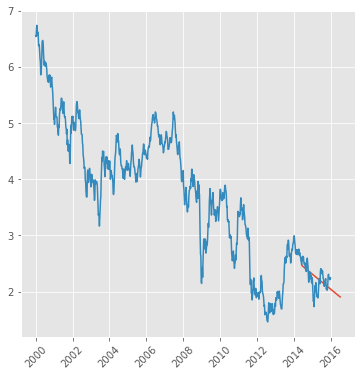

In [24]:
plt.figure(figsize=(6,6,))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(stock_train)